In [3]:
# The purpose of this research project is to ask the following questions:
#    1) How have LA slow-street ordinances increased access to outdoor space?
#            a) What did access to open-space look like before COVID?
#            b) Have slow-streets increased access?

#        Are neighborhoods with existing health vulnerability getting equitable access?

In [4]:
# For this homework assignment, I will:
# 1) Clean up my notebook to keep only essentials for this week.
# 2) Attempt to create a function
# 3) Per midterm feedback, create an index that identifies tracts with x% health vulnerability

In [5]:
# Begin by importing data commands

In [330]:
# for general data wrangling tasks
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as pltimport
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
import contextily as ctx
import plotly.express as px
from sodapy import Socrata
import sys
sys.setrecursionlimit(200)

In [238]:
# Import each dataset used. All files were downloaded as kml, kmz, or geojson files.

In [283]:
obese = gpd.read_file('data/ObeseLA.geojson')
heart = gpd.read_file('data/HeartLA.json')
asthma = gpd.read_file('data/Prevalence_of_Adult_Asthma,_2013-2014.geojson')
streetsLA= gpd.read_file('data/Implemented_Slow_Streets.geojson')
walkLA= gpd.read_file('data/WalkLA150min.geojson')
parksLA= gpd.read_file('data/Recreation_and_Parks.geojson')

In [247]:
# Let's find out what the average statistics are regarding slow streets in LA.
# What is the average statistics for slow streets in LA?
streetsLA['description'].describe()

count                 172
unique                 26
top       North Hollywood
freq                   11
Name: description, dtype: object

In [248]:
# This command didn't tell us much because the streets' descriptions are object data. Let's try a .head() function to get a preview of the data.

In [249]:
streetsLA.head()

,name,description,tessellate,geometry
0,S Westgate Ave,Sawtelle,True,"LINESTRING Z (-118.46354 34.04731 0.00000, -11..."
1,Lindblade Dr,Del Rey,True,"LINESTRING Z (-118.42411 33.99736 0.00000, -11..."
2,Nebraska Ave,Sawtelle,True,"LINESTRING Z (-118.45871 34.03627 0.00000, -11..."
3,Texas St,Sawtelle,True,"LINESTRING Z (-118.46184 34.04535 0.00000, -11..."
4,Kensington Rd,Del Rey,True,"LINESTRING Z (-118.41966 33.99793 0.00000, -11..."


In [250]:
# From observation, it looks like we can use "description" to identify the neighborhood of the slow street.

In [251]:
# Let's also try a tail
streetsLA.tail()

,name,description,tessellate,geometry
168,Ceilhunt Rd\n,Mar Vista,True,"LINESTRING Z (-118.43795 34.02719 0.00000, -11..."
169,Coolidge Ave\n,None,True,"LINESTRING Z (-118.43868 34.02684 0.00000, -11..."
170,Stoner Ave\n,Mar Vista,True,"LINESTRING Z (-118.44074 34.02376 0.00000, -11..."
171,Granville Ave\n,Mar Vista,True,"LINESTRING Z (-118.44386 34.02597 0.00000, -11..."
172,Radio Ave\n,Mar Vista,True,"LINESTRING Z (-118.44324 34.02486 0.00000, -11..."


In [252]:
# Hmm. It looks like some of the data does not have a description listed. This may make it difficult to try a call function by neighborhood, but let's try.

In [253]:
# First, what neighborhoods are listed within the dataset?
streetsLA['description'].value_counts()

North Hollywood    11
Del Rey            11
Jefferson Park     10
Valley Village     10
East Hollywood      9
Watts               8
Mar Vista           8
Eagle Rock          8
HSDNC               8
Koreatown           7
South Park          7
Palms               7
Highland Park       6
Cypress Park        6
Los Feliz           6
South LA            6
MacArthur Park      6
Culver City         5
Wilmington          5
Studio City         5
Mid City West       5
Boyle Heights       4
Sawtelle            4
South Robertson     4
Adams-Normandie     4
Pico                2
Name: description, dtype: int64

In [ ]:
# Let's create an index with just the slow street and its accompanying neighborhood.

In [254]:
streetsLAplaces = streetsLA['description'].value_counts()
streetsLAplaces = streetsLA['description'].reset_index()
streetsLAplaces


,index,description
0,0,Sawtelle
1,1,Del Rey
2,2,Sawtelle
3,3,Sawtelle
4,4,Del Rey
...,...,...
168,168,Mar Vista
169,169,None
170,170,Mar Vista
171,171,Mar Vista


In [256]:
# Re-label the columns
streetsLAplaces.columns = ['Slow_Street#', 'Neighborhood']
streetsLAplaces

,Slow_Street#,Neighborhood
0,0,Sawtelle
1,1,Del Rey
2,2,Sawtelle
3,3,Sawtelle
4,4,Del Rey
...,...,...
168,168,Mar Vista
169,169,None
170,170,Mar Vista
171,171,Mar Vista


In [306]:
# Now,let's attempt a function
def streetsLAplaces(Neighborhood):

# list of neighborhoods
    Neighborhood = ['Culver City'],

# call the function with a loop
    for Neighborhood in Neighborhood:
        streetsLAplaces(Neighborhood)
  

In [307]:
streetsLAplaces(Neighborhood = 'Culver City')

RecursionError: maximum recursion depth exceeded

In [ ]:
# This is something I will need to continue troubleshooting. My goal of the function is to be able to call out a specific neighborhood, e.g. Culver City, and have all rows displayed with that neighborhood :( #

In [ ]:
# "Maximum recursion depth exceeded" is the error I keep getting. I also tried changing the number of times it loops, but the function seems to not stop. Maybe it's best to create a querty instead? Need to follow up on in class or make office hours appointment.

In [23]:
# Let's make parks into an index that way we can plot the total for each park type. I think I should find a new data layer though that looks at subtypes of parks (dog park, golf, etc.)

In [308]:
parks_count = parksLA['Park_Class'].value_counts()
parks_count = parks_count.reset_index()
parks_count.columns = ['Park Type', 'Count']
parks_count

,Park Type,Count
0,N,307
1,C,118
2,R,54


In [327]:
# Filter out all the regional parks since they are not as prevalent on zip-code level.
parks_count.loc[parks_count['Park Type'] != 'R']

,Park Type,Count
0,N,307
1,C,118


In [30]:
# Let's repeat this process using the weekly exercise data.

In [310]:
walkLA_count = walkLA['Percent_'].value_counts()
walkLA_count = walkLA_count.reset_index()
walkLA_count.columns = ['Percent within Zip', 'Zip Code Frequency']
walkLA_count

,Percent within Zip,Zip Code Frequency
0,32.2,5
1,34.3,4
2,32.9,4
3,32.4,4
4,34.8,4
...,...,...
69,32.7,1
70,31.8,1
71,46.9,1
72,45.1,1


In [34]:
# We now have a cleaned variable for us to look at what the weekly walking rate is across the City.

In [42]:
# Now let's plot some of the health data

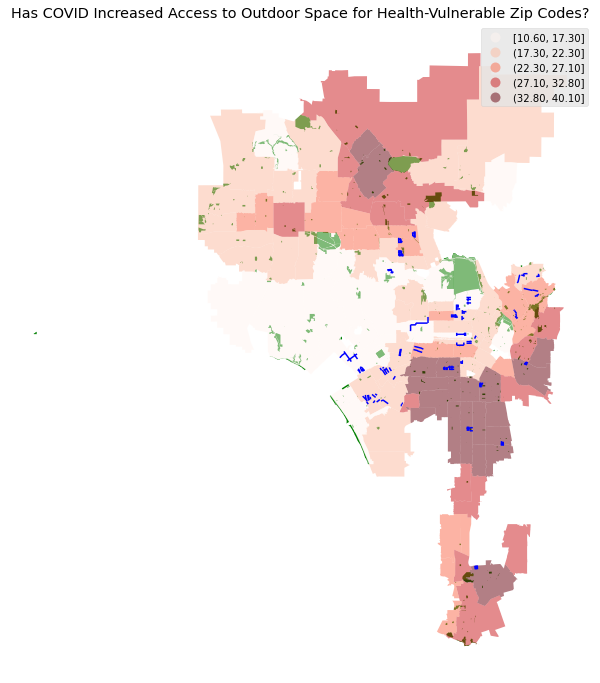

In [54]:
fig, ax = plt.subplots(figsize=(12, 12))

# name each subplot
ax.axis('off') 

ax.set_title("Has COVID Increased Access to Outdoor Space for Health-Vulnerable Zip Codes?")

streetsLA.plot(ax=ax, color='blue', legend=True)
parksLA.plot(ax=ax, color='green', legend=True)

# regular count map on the left
obese.plot(column=obese['Percent_'],
            alpha = 0.50,
            cmap='Reds',
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            ax=ax, 
           legend=True,
           )

In [55]:
# Let's filter out all the zip codes with the highest health vulnerabilities combined/

In [340]:
zip_score = gpd.sjoin(obese, heart, how="inner", op='intersects')

In [345]:
zip_score.head()

,OBJECTID_1,ZIPCODE_left,Percent__left,LowerCL_left,UpperCL_left,Population_left,Shape__Are_left,Shape__Len_left,geometry,index_right,OBJECTID,ZIPCODE_right,Percent__right,LowerCL_right,UpperCL_right,Population_right,Shape__Are_right,Shape__Len_right
0,1,90001,38.2,31.7,44.7,41800,9.556340e+07,48677.278561,"POLYGON ((-118.24338 33.98924, -118.24333 33.9...",1,2,90002,3.9,2.7,5.1,37900,8.275222e+07,44972.017111
1,2,90002,39.7,31.7,47.7,37900,8.275222e+07,44972.017111,"POLYGON ((-118.23431 33.96101, -118.23425 33.9...",1,2,90002,3.9,2.7,5.1,37900,8.275222e+07,44972.017111
2,3,90003,39.3,30.8,47.8,40900,1.026431e+08,63303.481866,"POLYGON ((-118.28285 33.97597, -118.28285 33.9...",1,2,90002,3.9,2.7,5.1,37900,8.275222e+07,44972.017111
48,49,90059,39.9,32.3,47.4,26000,9.317326e+07,66238.808553,"POLYGON ((-118.23001 33.92786, -118.22995 33.9...",1,2,90002,3.9,2.7,5.1,37900,8.275222e+07,44972.017111
49,50,90061,40.1,32.6,47.5,19000,7.661144e+07,52266.348860,"POLYGON ((-118.27329 33.93888, -118.27324 33.9...",1,2,90002,3.9,2.7,5.1,37900,8.275222e+07,44972.017111


In [ ]:
# So, in conclusion, I have a lot of work to do. The above attempt at trying to create a function that called out Culver City slow streets does not run. However, I did make some progress in trying to merge obesity and heart disease together into one dataframe. That said, after looking at the head above, the zip codes do not align for Percent_left (obesity) and Percent_Right (heart disease). I need to truly decide if this is the best way to measure health vulnerability instead of seeing if LA has a pre-determined measurement that the City has already identified zip codes by.